In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import argparse
import random
import time
from collections import Counter
from datetime import datetime

In [2]:
categories  = pd.read_csv('./data/ecommerce-dataset/category_tree.csv', dtype={0: str, 1: str})
print(categories.categoryid.unique().size)
categories.describe()

1669


,categoryid,parentid
count,1669,1644
unique,1669,362
top,1491,250
freq,1,31


In [3]:
print(categories.categoryid.unique().size)
print(categories.parentid.unique().size)

1669
363


In [4]:
events = pd.read_csv('./data/ecommerce-dataset/events.csv', sep=',', dtype={0: np.int64, 1: str, 2: str, 3: str, 4: str})
events.columns = ["Timestamp", "UserId", "BehaviorType", "ItemId", "TransactionId"]
day = 7
min_timestamp = events.Timestamp.min()
time_id = [int(math.floor((t-min_timestamp) / (1000*86400*day))) for t in events['Timestamp']]
events['TimeId'] = time_id

session_id = [str(uid)+'_'+str(tid) for uid, tid in zip(events['UserId'], events['TimeId'])]
events['SessionId'] = session_id
events = events[["SessionId", "UserId", "ItemId", "Timestamp", "BehaviorType", "TimeId"]]

In [5]:
print(events.shape)
print(events.head())

(2756101, 6)
  SessionId  UserId  ItemId      Timestamp BehaviorType  TimeId
0  257597_4  257597  355908  1433221332117         view       4
1  992329_4  992329  248676  1433224214164         view       4
2  111016_4  111016  318965  1433221999827         view       4
3  483717_4  483717  253185  1433221955914         view       4
4  951259_4  951259  367447  1433221337106         view       4


In [6]:
props1 = pd.read_csv('./data/ecommerce-dataset/item_properties_part1.csv', dtype={0: np.int64, 1: str, 2: str, 3: str})
props2 = pd.read_csv('./data/ecommerce-dataset/item_properties_part2.csv', dtype={0: np.int64, 1: str, 2: str, 3: str})
props = pd.concat([props1, props2])
props.columns = ["Timestamp", "ItemId", "Property", "Value"]
print(props.shape)
print(props.head())

(20275902, 4)
       Timestamp  ItemId    Property                            Value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513


In [7]:
props_cate = props[props.Property == 'categoryid']
props_cate = props_cate[props_cate.ItemId.isin(events.ItemId)]

print("events表中有多少个item没有categoryid:")
print(len(events[~events.ItemId.isin(props_cate.ItemId)]["ItemId"].unique()))

events = events[events.ItemId.isin(props_cate.ItemId)]

props_cate = props_cate.drop(['Property'], axis=1)
props_cate = props_cate.rename(columns={'Value':'categoryid'})
props_cate = props_cate.reset_index(drop=True)

events表中有多少个item没有categoryid:
49815


In [8]:
props_cate.head()

,Timestamp,ItemId,categoryid
0,1435460400000,460429,1338
1,1435460400000,35575,1059
2,1437274800000,8313,1147
3,1439089200000,221365,1226
4,1431226800000,380850,691


In [9]:
time_min = events.Timestamp.min()
time_max = events.Timestamp.max()
# print(time_min)
# print(time_max)

d = datetime.fromtimestamp(time_min/1000.0) 
str_min = d.strftime("%Y-%m-%d %H:%M:%S.%f")
print("starting time: ", str_min)
d = datetime.fromtimestamp(time_max/1000.0) 
str_max = d.strftime("%Y-%m-%d %H:%M:%S.%f") 
print("ending time: ", str_max)
print("time interval(months):", (time_max-time_min)/1000.0/60/60/24/30)

user_cnt = len(events.UserId.unique())
item_cnt = len(events.ItemId.unique())
session_cnt = len(events.SessionId.unique())
all_cnt = events.shape[0]
print("user个数: ", user_cnt)
print("item个数: ", item_cnt)
print("session个数", session_cnt)
print("总行为数: ", all_cnt)
print("平均每个user行为数", all_cnt/user_cnt)
print("平均每个item行为数", all_cnt/item_cnt)
print("平均每个session行为数", all_cnt/session_cnt)

starting time:  2015-05-03 11:00:04.384000
ending time:  2015-09-18 10:59:47.788000
time interval(months): 4.5999935972222215
user个数:  1236032
item个数:  185246
session个数 1361990
总行为数:  2500516
平均每个user行为数 2.0230188215191838
平均每个item行为数 13.498353540697234
平均每个session行为数 1.835928310780549


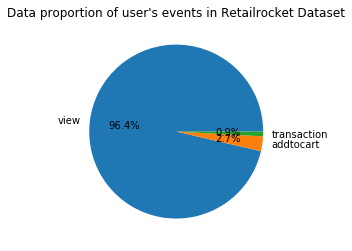

In [10]:
data = events.BehaviorType.value_counts()
indexes = data.index
values = data.values
plt.subplots(figsize=(4,4))
# Plot
plt.pie(values, labels=indexes,startangle=0, autopct='%.1f%%')
 
plt.title("Data proportion of user's events in Retailrocket Dataset")
plt.show()

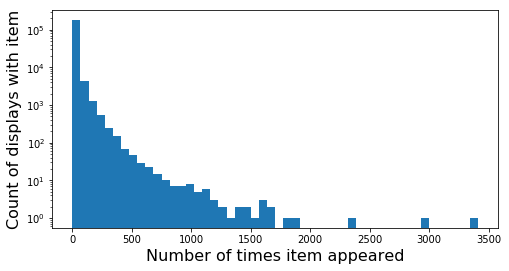

In [11]:
items = events.ItemId.value_counts()
plt.figure(figsize=(8, 4))
plt.hist(items.values, bins=50, log=True)
plt.xlabel('Number of times item appeared', fontsize=16)
plt.ylabel('Count of displays with item', fontsize=16)
plt.show()

In [12]:
item_cnt = len(events.ItemId.unique())
items = events.ItemId.value_counts()
print(sum(items >100), sum(items >100)/item_cnt)
print(sum(items <10), sum(items<10)/item_cnt)

4006 0.021625298252054025
135654 0.7322911155976377


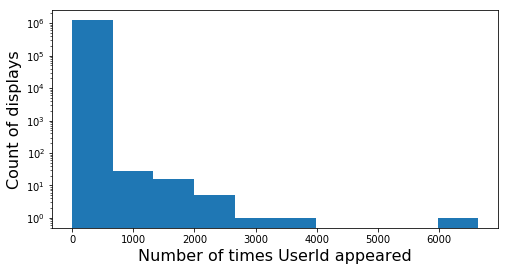

In [13]:
items = events.UserId.value_counts()
plt.figure(figsize=(8, 4))
plt.hist(items.values, bins=10, log=True)
plt.xlabel('Number of times UserId appeared', fontsize=16)
plt.ylabel('Count of displays', fontsize=16)
plt.show()

In [14]:
items = events.UserId.value_counts()
print(sum(items<10)/user_cnt)
print(sum(items<20)/user_cnt)
print(sum(items<30)/user_cnt)
print(sum(items<3)/user_cnt, sum(items>=3))
print(sum(items>=30)/user_cnt, sum(items>=30))

0.9820190739398332
0.9948917180137731
0.997552652358515
0.8482870993631233 187522
0.00244734764148501 3025


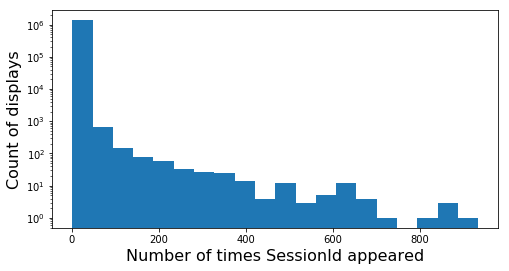

In [15]:
items = events.SessionId.value_counts()
plt.figure(figsize=(8, 4))
plt.hist(items.values, bins=20, log=True)
plt.xlabel('Number of times SessionId appeared', fontsize=16)
plt.ylabel('Count of displays', fontsize=16)
plt.show()

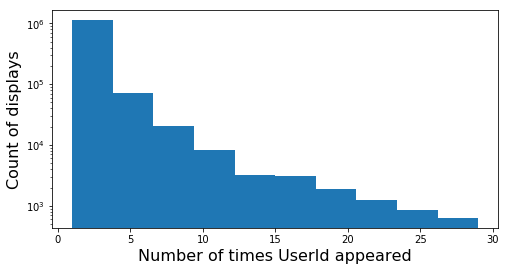

In [16]:
events = events[events['UserId'].groupby(events['UserId']).transform('size')< 30]
items = events.UserId.value_counts()
plt.figure(figsize=(8, 4))
plt.hist(items.values, bins=10, log=True)
plt.xlabel('Number of times UserId appeared', fontsize=16)
plt.ylabel('Count of displays', fontsize=16)
plt.show()

In [17]:
# events = events[events['UserId'].groupby(events['UserId']).transform('size')<= 10]
events = events[events['UserId'].groupby(events['UserId']).transform('size')>= 3]
events = events[events['ItemId'].groupby(events['ItemId']).transform('size')>= 10]

In [18]:
max_length = 20
events = events[events['SessionId'].groupby(events['SessionId']).transform('size')>1]
events = events[events['SessionId'].groupby(events['SessionId']).transform('size')<max_length]

UserId num: 144193
3 45747
4 24061
5 14381
6 9247
7 6135
8 4542
9 3344
10 2417


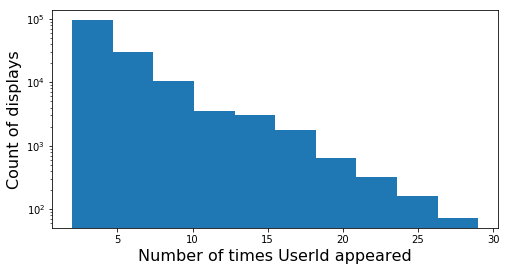

In [19]:
print("UserId num:", len(events.UserId.unique()))
items = events.UserId.value_counts()
for i in range(3,11):
    print(i , sum(items==i))
#     -----------

items = events.UserId.value_counts()
plt.figure(figsize=(8, 4))
plt.hist(items.values, bins=10, log=True)
plt.xlabel('Number of times UserId appeared', fontsize=16)
plt.ylabel('Count of displays', fontsize=16)
plt.show()

In [20]:
user_cnt = len(events.UserId.unique())
item_cnt = len(events.ItemId.unique())
session_cnt = len(events.SessionId.unique())
all_cnt = events.shape[0]
print("user个数: ", user_cnt)
print("item个数: ", item_cnt)
print("session个数", session_cnt)
print("总行为数: ", all_cnt)
print("平均每个user行为数", all_cnt/user_cnt)
print("平均每个item行为数", all_cnt/item_cnt)
print("平均每个session行为数", all_cnt/session_cnt)

user个数:  144193
item个数:  23599
session个数 160487
总行为数:  680336
平均每个user行为数 4.718231814304439
平均每个item行为数 28.829018178736387
平均每个session行为数 4.239196944300785


In [21]:
events.head()

,SessionId,UserId,ItemId,Timestamp,BehaviorType,TimeId
8,824915_4,824915,428805,1433220899221,view,4
13,598426_4,598426,156489,1433223697356,view,4
14,223343_4,223343,402625,1433224078165,view,4
15,57036_4,57036,334662,1433222531378,view,4
19,158090_4,158090,10572,1433221078505,addtocart,4


In [22]:
user_week = events["TimeId"].groupby(events["UserId"]).unique()
multiweek_dict = {}
for i, v in user_week.items():
    l = len(v)
    if l in multiweek_dict:
        multiweek_dict[l] += 1
    else:
        multiweek_dict[l] = 1
print(multiweek_dict)
# 用户不够活跃，基本只在一个session中出现

{1: 130831, 2: 11183, 3: 1641, 4: 383, 5: 110, 7: 9, 6: 33, 8: 3}


In [ ]:
# props_cate的尝试

In [22]:
props_cate = props_cate[props_cate.ItemId.isin(events.ItemId)]
len(props_cate.ItemId.unique())

18378

In [25]:
props_cate = pd.merge(props_cate,categories,left_on='categoryid',right_on='categoryid')

In [26]:
props_cate.head() 

,timestamp,itemid,categoryid,parentid
0,1438484400000,313481,1613,250
1,1438484400000,74371,1613,250
2,1437274800000,190070,1613,250
3,1437879600000,131099,1613,250
4,1437274800000,104468,1613,250


In [29]:
temp = props_cate[["ItemId","parentid"]]

In [30]:
temp = temp.drop_duplicates()

In [2]:
print(len(temp.parentid.unique()))

NameError: name 'temp' is not defined

### save

In [34]:
props_cate.to_csv("./ecommerce-dataset/filter_props_cate.csv", index=False)
events.to_csv("./ecommerce-dataset/filter_events.csv", index=False)

In [23]:
train = events
# timestamp UserId event  ItemId transactionid  TimeID SessionId

In [25]:
print(train.TimeId.unique())
print(len(train.TimeId.unique()))

[ 4  5  6  7  8 13 12 14 15 16 17 18 19  0  1  2  3  9 10 11]
20


In [26]:
tmax = train.TimeId.max()
session_max_times = train.groupby('SessionId').TimeId.max()

session_train = session_max_times[session_max_times < tmax-3].index
session_holdout = session_max_times[session_max_times >= tmax-3].index
train_tr = train[train['SessionId'].isin(session_train)]
holdout_data = train[train['SessionId'].isin(session_holdout)]

print('Number of train/test: {}/{}'.format(len(train_tr), len(holdout_data)))

Number of train/test: 575492/104844


In [28]:
print(train_tr.TimeId.unique())
print(holdout_data.TimeId.unique())

[ 4  5  6  7  8 13 12 14 15  0  1  2  3  9 10 11]
[16 17 18 19]


In [48]:
# events = events[events['UserId'].groupby(events['UserId']).transform('size')<= 10]
# events = events[events['UserId'].groupby(events['UserId']).transform('size')>= 3]

# events = events[events['ItemId'].groupby(events['ItemId']).transform('size')>= 10]

In [29]:
train_tr = train_tr[train_tr['ItemId'].groupby(train_tr['ItemId']).transform('size') >= 10]
train_tr = train_tr[train_tr['SessionId'].groupby(train_tr['SessionId']).transform('size') > 1]

print('Item size in train data: {}'.format(train_tr['ItemId'].nunique()))


Item size in train data: 18018


In [30]:
train_item_counter = Counter(train_tr.ItemId)
to_predict = Counter(el for el in train_item_counter.elements() if train_item_counter[el] >= 10).keys()
print('Size of to predict: {}'.format(len(to_predict)))

# split holdout to valid and test.
holdout_cn = holdout_data.SessionId.nunique()
holdout_ids = holdout_data.SessionId.unique()
np.random.shuffle(holdout_ids)
valid_cn = int(holdout_cn * 0.5)
session_valid = holdout_ids[0: valid_cn]
session_test = holdout_ids[valid_cn:]
valid = holdout_data[holdout_data['SessionId'].isin(session_valid)]
test = holdout_data[holdout_data['SessionId'].isin(session_test)]

valid = valid[valid['ItemId'].isin(to_predict)]
valid = valid[valid['SessionId'].groupby(valid['SessionId']).transform('size') > 1]

test = test[test['ItemId'].isin(to_predict)]
test = test[test['SessionId'].groupby(test['SessionId']).transform('size') > 1]

Size of to predict: 17732


In [31]:
print('Train set\n\tEvents: {}\n\tSessions: {}\n\tUsers: {}\n\tItems: {}\n\tAvg length: {}'.format(len(train_tr), train_tr.SessionId.nunique(), train_tr.UserId.nunique(),train_tr.ItemId.nunique(),
                                                                                      train_tr.groupby('SessionId').size().mean()))
print('Valid set\n\tEvents: {}\n\tSessions: {}\n\tUsers: {}\n\tItems: {}\n\tAvg length: {}'.format(len(valid), valid.SessionId.nunique(),valid.UserId.nunique(), valid.ItemId.nunique(), valid.groupby('SessionId').size().mean()))
print('Test set\n\tEvents: {}\n\tSessions: {}\n\tUsers: {}\n\tItems: {}\n\tAvg length: {}'.format(len(test), test.SessionId.nunique(), test.UserId.nunique(),test.ItemId.nunique(), test.groupby('SessionId').size().mean()))

Train set
	Events: 534349
	Sessions: 126589
	Users: 114836
	Items: 18018
	Avg length: 4.221132957839939
Valid set
	Events: 39213
	Sessions: 10199
	Users: 9973
	Items: 8415
	Avg length: 3.844788704774978
Test set
	Events: 39263
	Sessions: 10209
	Users: 9959
	Items: 8419
	Avg length: 3.84592026643158


In [46]:
df

,A,B,C,D
0,8,5,6,5
1,9,2,7,6
2,3,1,0,1
3,0,6,1,3
4,8,6,5,6
5,6,9,1,1
6,7,1,1,9
7,0,7,9,7
8,4,9,1,0
9,6,7,7,0


In [42]:
df = pd.DataFrame(np.random.randint(0,10,size=(10, 4)), columns=list('ABCD'))

In [45]:
df.sort_values(by = ["A","B" ], ascending = [True, True])

,A,B,C,D
3,0,6,1,3
7,0,7,9,7
2,3,1,0,1
8,4,9,1,0
9,6,7,7,0
5,6,9,1,1
6,7,1,1,9
0,8,5,6,5
4,8,6,5,6
1,9,2,7,6


In [47]:
train_tr = train_tr.sort_values(by = ["SessionId","Timestamp" ], ascending = [True, True])
valid = valid.sort_values(by = ["SessionId","Timestamp" ], ascending = [True, True])
test = test.sort_values(by = ["SessionId","Timestamp" ], ascending = [True, True])

In [48]:
train_tr.to_csv('./data/Retailrocket/train.tsv', sep='\t', index=False)
valid.to_csv('./data/Retailrocket/valid.tsv', sep='\t', index=False)
test.to_csv('./data/Retailrocket/test.tsv', sep='\t', index=False)

In [49]:
train_tr.head()

,SessionId,UserId,ItemId,Timestamp,BehaviorType,TimeId
2565936,1000001_11,1000001,202293,1437769095303,view,11
2577797,1000001_11,1000001,424515,1437770094773,view,11
2573974,1000001_11,1000001,230432,1437770157029,view,11
1834061,1000018_2,1000018,278214,1432183276435,view,2
1838381,1000018_2,1000018,19366,1432183286560,view,2


In [ ]:
time_id = [int(math.floor((t-min_timestamp) / (1000*86400*day))) for t in events['Timestamp']]
events['TimeID'] = time_id

categories categoryid	parentid

for props_cate.value